<a href="https://colab.research.google.com/github/ekomey/SVR-Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files
import tensorflow.compat.v1 as tf
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
%tensorflow_version 2.x
# print our metrics of model adequacy

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume (1).csv


Cloning into 'machine_learning_regression'...
fatal: could not read Username for 'https://projects.cs.nott.ac.uk': No such device or address


In [4]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Metro_Interstate_Traffic_Volume.csv']))
df = df2.dropna()
print(df.shape)
df.head()
# Dataset is now stored in a Pandas Dataframe

NameError: ignored

In [5]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



##df2 = df2.set_index('date_time')

print(df2)

NameError: ignored

In [ ]:
xvars = ["temp", "rain_1h", "snow_1h", "clouds_all"]  # taking the variables that we want to keep as our predictor variables, and putting them into a NumPy Array

X = df.loc[:, xvars].values   # get X values (i.e. predictors/features) # casting our predictors into a NumPy array
y = df.loc[:, "traffic_volume"].values  # get y values (i.e., outcome/target variable)

In [1]:
# Split traning/test data at random

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # the '0' is setting the seed; a way to "fix" the randomization process
len(X_train)
len(X)


NameError: ignored

In [ ]:
mod = LinearRegression()      # create model object
mod.fit(X_train, y_train)     # fitting the model to the "train" data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(mod.coef_)     # show regression coefficients; the numbers are just the "beta" values


[2.03771422e+01 1.41759285e-01 6.18593670e+02 3.89941368e+00]


In [ ]:
# Use our fitted model to make predictions using test set

y_pred = mod.predict(X_test)

In [ ]:
# print our metrics of model adequacy

from sklearn import metrics
import numpy as np

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared Value: ", metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error:  1701.0237286830916
Mean Squared Error:  3799938.6620990513
Root Mean Squared Error:  1949.3431360586703
R-Squared Value:  0.02834348685617749


(48204, 9)
Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Accuracy: [10142042. 10142042. 10142043. 10142042.]
Prediction: [[627.56494  608.42206  506.02542  ... 157.6856   738.15674   51.672703]
 [627.56494  608.42206  506.02542  ... 157.6856   738.15674   51.672703]
 [627.56494  608.42206  506.02542  ... 157.6856   738.15674   51.672703]
 [627.56494  608.42206  506.02542  ... 157.6856   738.15674   51.672703]]


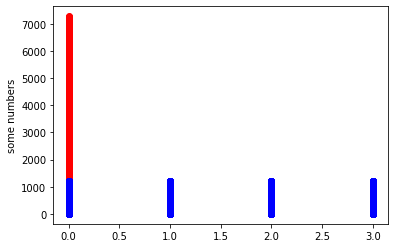

ValueError: ignored

In [16]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Metro_Interstate_Traffic_Volume.csv']))
df = df2.dropna()
print(df.shape)
df.head()
# Dataset is now stored in a Pandas Dataframe

xvars = ["temp", "rain_1h", "snow_1h", "clouds_all"]  # taking the variables that we want to keep as our predictor variables, and putting them into a NumPy Array

X = df.loc[:, xvars].values   # get X values (i.e. predictors/features) # casting our predictors into a NumPy array
y = df.loc[:, "traffic_volume"].values  # get y values (i.e., outcome/target variable)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accur = accuracy_score(y, y_model)

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
# fit the model on one set of data
#model.fit(X1, y1)

# evaluate the model on the second set of data
#y2_model = model.predict(X2)
#accuracy_score(y2, y2_model)

#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 24101
n_output = 24101
#Learning parameters
learning_constant = 0.2
number_epochs = 1000
batch_size = 1000

#Defining the input and the output
tf.disable_v2_behavior()
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

def multilayer_perceptron(input_d):
 #Task of neurons of first hidden layer
 layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
 #Task of neurons of second hidden layer
 layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
 #Task of neurons of output layer
 out_layer = tf.add(tf.matmul(layer_2, w3),b3)

 return out_layer

 #Create model
neural_network = multilayer_perceptron(X)

#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

#Initializing the variables
init = tf.global_variables_initializer()

X1 = np.savetxt('x1.txt', X1)
X2 = np.savetxt('x2.txt', X2)
y1 = np.savetxt('y1.txt', y1)
y2 = np.savetxt('y2.txt', y2)

#a_file = open("x1.txt")
#lines = a_file.readlines()
#for line in lines:
#    print(line)
#a_file.close()

batch_x1=np.loadtxt('x1.txt')
batch_x2=np.loadtxt('x2.txt')

batch_y1=np.loadtxt('y1.txt')
batch_y2=np.loadtxt('y2.txt')

label=batch_y2 #+1e-50-1e-50
batch_x=np.column_stack((np.transpose(batch_x1), np.transpose(batch_x2)))
batch_y=np.column_stack((np.reshape(batch_y1, (1,24102)), np.reshape(batch_y2, (1,24102))))

batch_x_train=batch_x[:,0:24101]
batch_y_train=batch_y[:,0:24101]

batch_x_test=batch_x[:,24102:48204]
batch_y_test=batch_y[:,24102:48204]

label_train=label[0:24101]
label_test=label[24102:48204]

with tf.Session() as sess:
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):

    sess.run(optimizer, feed_dict={X: batch_x_train, Y: batch_y_train})
    #Display the epoch
    if epoch % 100 == 0:
      print("Epoch:", '%d' % (epoch))
  # Test model
  pred = (neural_network) # Apply softmax to logits
  accuracy=tf.keras.losses.MSE(pred,Y)
  print("Accuracy:", accuracy.eval({X: batch_x_train, Y: batch_y_train}))
  #tf.keras.evaluate(pred,batch_x)
  print("Prediction:", pred.eval({X: batch_x_train}))
  output=neural_network.eval({X: batch_x_train})
  plt.plot(batch_y_train[0:10], 'ro', output[0:10], 'bo')
  plt.ylabel('some numbers')
  plt.show()

  estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
  correct_prediction1 = tf.equal(tf.argmax(pred, 1),label)
  accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
  print(accuracy1.eval({X: batch_x}))